In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# load quater-hourly load data for germany
load_df_16_17 = pd.read_csv("data/electricity_demand/Actual_consumption_201601010000_201712312359.csv", sep=";")
# load_df_18_19 = pd.read_csv("Data\load_profile\Actual_consumption_201801010000_201912312359.csv", sep=";")

In [3]:
load_df_16_17

,Date,Time of day,Total[MWh],Residual load[MWh]
0,"Jan 1, 2016",12:00 AM,"10,573",-
1,"Jan 1, 2016",12:15 AM,"10,508",-
2,"Jan 1, 2016",12:30 AM,"10,446",-
3,"Jan 1, 2016",12:45 AM,"10,378",-
4,"Jan 1, 2016",1:00 AM,"10,216",-
...,...,...,...,...
70171,"Dec 31, 2017",10:45 PM,"10,978",-
70172,"Dec 31, 2017",11:00 PM,"10,865",-
70173,"Dec 31, 2017",11:15 PM,"10,764",-
70174,"Dec 31, 2017",11:30 PM,"10,664",-


In [4]:
# create datetime index
load_df = load_df_16_17#pd.concat([load_df_16_17,load_df_18_19], ignore_index=True)
load_df.index = pd.to_datetime(load_df["Date"] +" "+ load_df["Time of day"], format="%b %d, %Y %I:%M %p").dt.tz_localize('CET', ambiguous='infer')
load_df = load_df.loc[load_df.index.year == 2017]
load_df.head()

,Date,Time of day,Total[MWh],Residual load[MWh]
2017-01-01 00:00:00+01:00,"Jan 1, 2017",12:00 AM,"11,272",-
2017-01-01 00:15:00+01:00,"Jan 1, 2017",12:15 AM,"11,226",-
2017-01-01 00:30:00+01:00,"Jan 1, 2017",12:30 AM,"11,191",-
2017-01-01 00:45:00+01:00,"Jan 1, 2017",12:45 AM,"11,112",-
2017-01-01 01:00:00+01:00,"Jan 1, 2017",1:00 AM,"11,012",-


In [5]:
# drop columns
#load_df.drop(columns=["Date","Time of day"], inplace=True)
# convert to float
#load_df.loc[load_df["Total[MWh]"]=="-","Total[MWh]"] = 0]
load_df.loc[:,"Total[MWh]"] = load_df["Total[MWh]"].str.replace(",","").astype(float)
load_df.head()

C:\Users\david\AppData\Local\Temp\ipykernel_1664\173474054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df.loc[:,"Total[MWh]"] = load_df["Total[MWh]"].str.replace(",","").astype(float)


,Date,Time of day,Total[MWh],Residual load[MWh]
2017-01-01 00:00:00+01:00,"Jan 1, 2017",12:00 AM,11272.0,-
2017-01-01 00:15:00+01:00,"Jan 1, 2017",12:15 AM,11226.0,-
2017-01-01 00:30:00+01:00,"Jan 1, 2017",12:30 AM,11191.0,-
2017-01-01 00:45:00+01:00,"Jan 1, 2017",12:45 AM,11112.0,-
2017-01-01 01:00:00+01:00,"Jan 1, 2017",1:00 AM,11012.0,-


In [6]:
h_load_df = load_df.resample("H").sum()
h_load_df.head()

,Total[MWh]
2017-01-01 00:00:00+01:00,44801.0
2017-01-01 01:00:00+01:00,43573.0
2017-01-01 02:00:00+01:00,42397.0
2017-01-01 03:00:00+01:00,40986.0
2017-01-01 04:00:00+01:00,40188.0


In [7]:
h_load_df[2015:7228]

,Total[MWh]
2017-03-25 23:00:00+01:00,45037.0
2017-03-26 00:00:00+01:00,41927.0
2017-03-26 01:00:00+01:00,37707.0
2017-03-26 03:00:00+02:00,39222.0
2017-03-26 04:00:00+02:00,39468.0
...,...
2017-10-29 00:00:00+02:00,44839.0
2017-10-29 01:00:00+02:00,42275.0
2017-10-29 02:00:00+02:00,40926.0
2017-10-29 02:00:00+01:00,40013.0


In [11]:
# remove leap day
leap_day = (h_load_df.index.month == 2) & (h_load_df.index.day > 28)
h_load_df = h_load_df[~leap_day]

# # calc mean for each hour across years
# hour_mean = h_load_df.groupby([h_load_df.index.month, h_load_df.index.day , h_load_df.index.hour]).mean()
# hour_mean.index = range(len(hour_mean))
h_load_df


# ensure its exactly one year
assert len(h_load_df) == 8760

<AxesSubplot:>

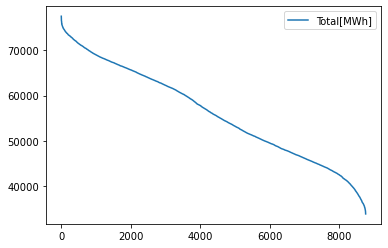

In [8]:
# plot load-duration curve for validation
h_load_df.sort_values("Total[MWh]", ignore_index=True,ascending=False).plot() # single 0-value appears off


In [9]:
h_load_df[h_load_df["Total[MWh]"]==0] 
load_df[load_df["Date"]=="Mar 26, 2017"].head(20)#The 0 value is due to the change in time zone.. 
load_df[load_df["Date"]=="Oct 29, 2017"].head(20) #in the other direction, 2-3am on 29.10 appears twice

,Date,Time of day,Total[MWh],Residual load[MWh]
2017-10-29 00:00:00+02:00,"Oct 29, 2017",12:00 AM,11576.0,-
2017-10-29 00:15:00+02:00,"Oct 29, 2017",12:15 AM,11232.0,-
2017-10-29 00:30:00+02:00,"Oct 29, 2017",12:30 AM,11057.0,-
2017-10-29 00:45:00+02:00,"Oct 29, 2017",12:45 AM,10974.0,-
2017-10-29 01:00:00+02:00,"Oct 29, 2017",1:00 AM,10755.0,-
2017-10-29 01:15:00+02:00,"Oct 29, 2017",1:15 AM,10526.0,-
2017-10-29 01:30:00+02:00,"Oct 29, 2017",1:30 AM,10534.0,-
2017-10-29 01:45:00+02:00,"Oct 29, 2017",1:45 AM,10460.0,-
2017-10-29 02:00:00+02:00,"Oct 29, 2017",2:00 AM,10258.0,-
2017-10-29 02:15:00+02:00,"Oct 29, 2017",2:15 AM,10152.0,-


In [12]:
# plan for regional scaling:
# assume electricity demand is somehow split between households and industry.
# households: use Data\opendata_ffe_demandregio_spatial_lk401.json for 
# industry: use remaining load and distribute it by Data\load_profile\nama_10r_3gdp.zip

hh_demand = pd.read_csv("results/netto_voll_calculated.csv", index_col="stat_bnd_amt_id")#, usecols=["NUTS", "geometry", "demand [MWh/a_2017]"])
hh_demand.head()

,GEN,BEZ,NUTS,WSK,DEBKG_ID,geometry,stat_bnd_amt_id.1,population,population_m,population_w,brutto_mon_arbeitsort,brutto_mon_wohnort,demand [MWh/a_2017],Arbeitsstunden pro Arbeiter,wohnort stundenlohn,arbeitsort stundenlohn,Erwerbstätige,netto_mon_wohnort,wohnort nettolohn [€/h],voll
stat_bnd_amt_id,,,,,,,,,,,,,,,,,,,,
1001,Flensburg,Kreisfreie Stadt,DEF01,2008-01-01,DEBKGDL20000002R,"POLYGON ((9.412664108896104 54.8226409083269, ...",1001,89504,44599,44905,2986.055556,2758.948276,137067.442378,1618,20.461916,22.146271,59876.0,2294.881867,17.020137,14.500704
1002,Kiel,Kreisfreie Stadt,DEF02,2006-01-01,DEBKGDL20000E43X,"POLYGON ((10.16915818579685 54.43137670797367,...",1002,247548,120566,126982,3303.962273,3148.856511,383927.889667,1624,23.267413,24.413514,171753.0,2621.247180,19.368822,16.504912
1003,Lübeck,Kreisfreie Stadt,DEF03,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((10.87683500018058 53.9873651861558, ...",1003,217198,104371,112827,3035.921109,3022.366925,334958.088097,1642,22.087943,22.187000,128247.0,2504.140940,18.300665,14.641214
1004,Neumünster,Kreisfreie Stadt,DEF04,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((9.995446122384307 54.14971926107451,...",1004,79487,39241,40246,2841.743194,2800.877644,122846.457156,1647,20.407123,20.704868,52372.0,2384.541714,17.373710,14.443124
1051,Dithmarschen,Kreis,DEF05,2011-08-01,DEBKGDL20000E14G,MULTIPOLYGON (((9.0740249235541 54.36276991647...,1051,133210,65720,67490,2913.626492,2971.936526,206636.303878,1647,21.653454,21.228608,60566.0,2493.212362,18.165482,13.193551


In [13]:
hh_total_dem = hh_demand["demand [MWh/a_2017]"].sum()
hh_total_dem # closely matches https://www.destatis.de/EN/Themes/Society-Environment/Environment/Material-Energy-Flows/Tables/electricity-consumption-households.html


128200000.0

In [14]:
h_load_df["households"] =  h_load_df["Total[MWh]"] * hh_total_dem/h_load_df["Total[MWh]"].sum()
#h_load_df["industry"] = h_load_df["Total[MWh]"] - h_load_df.households


regional_hh_share_of_load = hh_demand["demand [MWh/a_2017]"]/hh_demand["demand [MWh/a_2017]"].sum()

regional_hh_share_of_load.sum()

1.0

In [16]:
# load geodata
geo_gdp = pd.read_csv(r"data\nama_10r_3gdp\nama_10r_3gdp_1_Data.csv")
geo_gdp.set_index("GEO",inplace=True)

# store bnd-id for column naming
id_colnames = [f"{int(bnd_id):05}" for bnd_id in hh_demand.index]
# set index to nuts for indexing
hh_demand.set_index("NUTS",drop=False,inplace=True)

hh_demand.loc[geo_gdp.index,"gdp"] = geo_gdp["Value"]
# scale to values in range [0-1] whose sum is 1
regional_gdp_share_of_load = hh_demand["gdp"]/hh_demand["gdp"].sum()
regional_gdp_share_of_load

NUTS
DEF01    0.001150
DEF02    0.003569
DEF03    0.002664
DEF04    0.000981
DEF05    0.001341
           ...   
DEG0I    0.000879
DEG0J    0.000585
DEG0K    0.000704
DEG0L    0.000710
DEG0M    0.000618
Name: gdp, Length: 401, dtype: float64

In [17]:
regional_hh_series = np.matmul(regional_hh_share_of_load.values.reshape((401,1)), h_load_df["households"].values.reshape((1,8760)))
#regional_gdp_series = np.matmul(regional_gdp_share_of_load.values.reshape((401,1)), h_load_df["industry"].values.reshape((1,8760)))


In [18]:
geo_series_df = pd.DataFrame((
    #regional_gdp_series + 
    regional_hh_series).T,columns=hh_demand["NUTS"])

err = geo_series_df.sum().sum() - h_load_df["Total[MWh]"].sum()
print(geo_series_df.shape, err)

(8760, 401) -363924760.0


In [19]:
hh_geo_demand_df = pd.DataFrame(regional_hh_series.T, columns=id_colnames)
hh_geo_demand_df

,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
0,12.478052,34.951205,30.493197,11.183433,18.811313,27.639508,23.324297,28.275259,44.074298,18.162171,...,9.871333,9.010885,15.341186,11.577570,7.944910,15.135095,11.698659,11.488762,13.994268,12.778448
1,12.136028,33.993189,29.657375,10.876894,18.295693,26.881906,22.684976,27.500231,42.866217,17.664344,...,9.600759,8.763896,14.920682,11.260228,7.727139,14.720241,11.377997,11.173854,13.610684,12.428189
2,11.808486,33.075740,28.856947,10.583335,17.801907,26.156386,22.072727,26.758022,41.709292,17.187598,...,9.341642,8.527365,14.517985,10.956323,7.518590,14.322954,11.070914,10.872281,13.243343,12.092763
3,11.415492,31.974958,27.896569,10.231115,17.209448,25.285884,21.338132,25.867498,40.321180,16.615583,...,9.030746,8.243569,14.034817,10.591689,7.268367,13.846276,10.702467,10.510444,12.802596,11.690308
4,11.193232,31.352403,27.353421,10.031914,16.874379,24.793566,20.922677,25.363856,39.536124,16.292077,...,8.854917,8.083066,13.761558,10.385469,7.126851,13.576688,10.494089,10.305805,12.553328,11.462697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,14.141384,39.610221,34.557958,12.674191,21.318873,31.323871,26.433440,32.044368,49.949428,20.583199,...,11.187188,10.212041,17.386175,13.120867,9.003971,17.152613,13.258097,13.020221,15.859713,14.481823
8756,13.116146,36.738514,32.052535,11.755323,19.773272,29.052917,24.517038,29.721178,46.328136,19.090934,...,10.376126,9.471677,16.125692,12.169615,8.351191,15.909063,12.296896,12.076266,14.709897,13.431903
8757,12.432096,34.822481,30.380892,11.142245,18.742032,27.537713,23.238395,28.171122,43.911974,18.095281,...,9.834978,8.977698,15.284685,11.534930,7.915649,15.079354,11.655573,11.446450,13.942728,12.731386
8758,12.419563,34.787375,30.350263,11.131012,18.723137,27.509951,23.214967,28.142722,43.867704,18.077038,...,9.825063,8.968647,15.269276,11.523301,7.907669,15.064151,11.643822,11.434910,13.928672,12.718550


In [20]:
dt = h_load_df.index.strftime('%d.%m.%Y %H:%M') #formatting dates so that I can reuse already existing model code
hh_geo_demand_df.insert(loc=0,column='Date',value=dt)

sum of deviation: 2.1827872842550278e-10


<AxesSubplot:title={'center':'deviation histogram'}, ylabel='Frequency'>

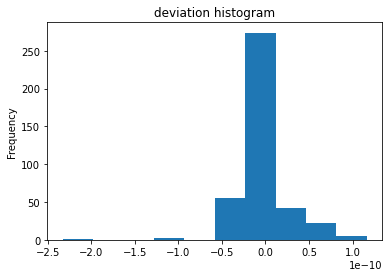

In [21]:
# sanity checks:
# check if sum of hh demand equals original value
# equality doesn't work due to floating point inaccuracies
diff = hh_demand["demand [MWh/a_2017]"] - regional_hh_series.sum(axis=1)
print(f"sum of deviation: {diff.sum()}")
diff.plot(kind="hist", title="deviation histogram")


In [23]:
hh_geo_demand_df.to_csv("results/load_profiles/nuts3_hh_demand_profiles.csv", index=False)